In [3]:
import numpy as np
np.arange(320,620,10)

array([320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440,
       450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570,
       580, 590, 600, 610])

In [1]:
import subprocess
import pandas as pd
import numpy as np

# parameters (change as needed)
mjd_start_values = [57400.0]
mjd_end_values = [57401.0]
nspan_values = [300]
ncoeffs_values = [3]
maxha_values = [8.0]
telescope_code_values = ['GMRT']
frequencies = np.arange(320,620,10)

# generate input files for different parameter combinations
with open("output_file.txt", 'w') as file:
    for frequency in frequencies:
        for mjd_start in mjd_start_values:
            for mjd_end in mjd_end_values:
                for nspan in nspan_values:
                    for ncoeffs in ncoeffs_values:
                        for maxha in maxha_values:
                            for telescope_code in telescope_code_values: 
                                    output_file = f"tempo2_input_{mjd_start}_{mjd_end}_{nspan}_{ncoeffs}_{maxha}_{telescope_code}_{frequency}.txt"
                                    parameter_values = [mjd_start, mjd_end, nspan, ncoeffs, maxha, telescope_code, frequency]
                                    line = " ".join(map(str, parameter_values)) + "\n"
                                    file.write(line)

#AWK commands

#To capture the paramaters from the parameter sweep file and run tempo2 polyco on it 
with open("tempo_param_capture.awk", 'r') as awk_file:
    awk_command = awk_file.read()
subprocess.run(f'awk \'{awk_command}\' output_file.txt | sh', shell=True)

#To extract the coefficients and required constants from output of tempo2 to calculate phase and frequency 
#with open("fsweep_extract_coeff.awk", 'r') as awk_file:
    #awk_command = awk_file.read()
#subprocess.run(f'awk \'{awk_command}\' *polyco_new.dat | sh', shell=True)

#Calculate phae and frequency 

def calculate_phase_and_frequency(mjd, tmid, rphase, coeff1, coeff2, coeff3,f0):
    # Calculate the time difference in minutes
    dt = (mjd - tmid) * 1440

    # Calculate phase
    phase = rphase + dt * 60 * f0 + coeff1 + dt * coeff2 + dt**2 * coeff3
    
    norm_phase  = phase% 1
    # Calculate frequency in Hz
    freq = f0+ (1 / 60) * (coeff2 + 2 * dt * coeff3)

    return phase, freq,norm_phase

df=[]
#freq_sweep = [320,322,324,326,330,332,340,380,400]
mjd_input = 57001.43000  # Replace with the desired MJD value
#f0 = 11.188233045354
output_pred = []


for frequ in range(len(frequencies)):
    
    #To extract the coefficients and required constants from output of tempo2 to calculate phase and frequency 
    with open("fsweep_extract_coeff.awk", 'r') as awk_file:
        awk_command = awk_file.read()
        command = f'awk \'{awk_command}\' {frequencies[frequ]}polyco_new.dat'
        subprocess.run(command, shell=True, check=True)
    
    file_path = f'coeff_data_{frequencies[frequ]}.dat'
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=['Pulsar', 'TMID', 'F0','RPHASE', 'COEFF1', 'COEFF2', 'COEFF3'],skiprows=1)
    
    for index, row in df.iterrows():
        psrname, tmid, f0,rphase, coeff1, coeff2, coeff3 = row
        phase,freq,norm_phase = calculate_phase_and_frequency(mjd_input, tmid, rphase, coeff1, coeff2, coeff3,f0)
        output = [psrname,frequencies[frequ],tmid,mjd_input,phase,norm_phase,freq]
        output_pred.append(output)
        print(f"Pulsar: {psrname}, Freq = {frequencies[frequ]}, MJD: {mjd_input}, Phase: {phase}, Frequency: {freq} Hz")



This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under conditions of GPL license.

************************************************* 
************************************************* 
[tempo2Util.C:396] Warning: [CLK3] no clock corrections available for clock UTC(gmrt) for MJD 57399.7
[tempo2Util.C:396] Warning: [CLK4] Trying assuming UTC = UTC(gmrt)
[tempo2Util.C:396] Warning: [CLK9] ... ok, using stated approximation 
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.
[tempo2Util.C:396] Warning: [CLK6] Proceeding assuming UTC =  UTC(gmrt)
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under conditions of GPL license.

************************************************* 
************************************************* 
[tempo2Util.C:396] Warning: [CLK3] no clock corrections available for clock UTC(gmrt) for MJD 57399.7
[tempo2Util.C:396

In [4]:
#This was done to avoid the running polyco again 
import subprocess
import pandas as pd
import numpy as np
frequencies = np.arange(320,620,10)


In [5]:
#Calculate phae and frequency 
import pandas as pd
import numpy as np
frequencies = np.arange(320,620,10)

def calculate_phase_and_frequency(mjd, tmid, rphase, coeff1, coeff2, coeff3,f0):
    # Calculate the time difference in minutes
    dt = (mjd - tmid) * 1440

    # Calculate phase
    phase = rphase + dt * 60 * f0 + coeff1 + dt * coeff2 + dt**2 * coeff3
    
    norm_phase  = phase% 1
    # Calculate frequency in Hz
    freq = f0+ (1 / 60) * (coeff2 + 2 * dt * coeff3)

    return phase, freq,norm_phase

df=[]
#freq_sweep = [320,322,324,326,330,332,340,380,400]
mjd_input = 57401.3000  # Replace with the desired MJD value
#f0 = 11.188233045354
output_pred = []


for frequ in range(len(frequencies)):
    
    #To extract the coefficients and required constants from output of tempo2 to calculate phase and frequency 
    with open("fsweep_extract_coeff.awk", 'r') as awk_file:
        awk_command = awk_file.read()
        command = f'awk \'{awk_command}\' {frequencies[frequ]}polyco_new.dat'
        subprocess.run(command, shell=True, check=True)
    
    file_path = f'coeff_data_{frequencies[frequ]}.dat'
    df = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=['Pulsar', 'TMID', 'F0','RPHASE', 'COEFF1', 'COEFF2', 'COEFF3'],skiprows=1)
    
    for index, row in df.iterrows():
        psrname, tmid, f0,rphase, coeff1, coeff2, coeff3 = row
        phase,freq,norm_phase = calculate_phase_and_frequency(mjd_input, tmid, rphase, coeff1, coeff2, coeff3,f0)
        output = [psrname,frequencies[frequ],tmid,mjd_input,phase,rphase,norm_phase,freq]
        output_pred.append(output)
        print(f"Pulsar: {psrname}, Freq = {frequencies[frequ]}, MJD: {mjd_input}, Phase: {phase}, Frequency: {freq} Hz")

Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660688.5216566, Frequency: 11.187214148685653 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660681.3704863, Frequency: 11.187111332513693 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660684.3800129, Frequency: 11.18716322995795 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660689.403617, Frequency: 11.187261786270232 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660688.0664569, Frequency: 11.187218148750947 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660687.0533545, Frequency: 11.187179763325977 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660687.2570055, Frequency: 11.187193535024829 Hz
Pulsar: 0835-4510, Freq = 320, MJD: 57401.3, Phase: 1002660687.3754381, Frequency: 11.187208497993447 Hz
Pulsar: 0835-4510, Freq = 330, MJD: 57401.3, Phase: 1002660690.3572268, Frequency: 11.18721414580252 Hz
Pulsar: 0835-4510, Freq = 330, MJD: 57401.3, Phase: 100266

In [6]:
df

,Pulsar,TMID,F0,RPHASE,COEFF1,COEFF2,COEFF3
0,0835-4510,57399.604167,11.188233,1.001022e+09,-0.000012,-0.059743,-2.851165e-07
1,0835-4510,57399.812500,11.188233,1.001223e+09,-0.000168,-0.060383,-1.615354e-06
2,0835-4510,57400.020833,11.188233,1.001424e+09,-0.000074,-0.061204,-8.098798e-07
3,0835-4510,57400.229167,11.188233,1.001626e+09,0.000131,-0.061146,9.309849e-07
4,0835-4510,57400.604167,11.188233,1.001988e+09,-0.000015,-0.060268,-3.124940e-07
5,0835-4510,57400.812500,11.188233,1.002190e+09,-0.000169,-0.060920,-1.622125e-06
6,0835-4510,57401.020833,11.188233,1.002391e+09,-0.000071,-0.061736,-7.894250e-07
7,0835-4510,57401.229167,11.188233,1.002592e+09,0.000133,-0.061665,9.447773e-07


In [7]:
output_pred

[['0835-4510',
  320,
  57399.6041666666,
  57401.3,
  1002660688.5216566,
  1001021536.206806,
  0.5216566324234009,
  11.187214148685653],
 ['0835-4510',
  320,
  57399.8124999999,
  57401.3,
  1002660681.3704863,
  1001222906.410953,
  0.3704862594604492,
  11.187111332513693],
 ['0835-4510',
  320,
  57400.0208333332,
  57401.3,
  1002660684.3800129,
  1001424276.350584,
  0.3800128698348999,
  11.18716322995795],
 ['0835-4510',
  320,
  57400.2291666666,
  57401.3,
  1002660689.403617,
  1001625646.155962,
  0.4036170244216919,
  11.187261786270232],
 ['0835-4510',
  320,
  57400.6041666666,
  57401.3,
  1002660688.0664569,
  1001988112.19798,
  0.06645691394805908,
  11.187218148750947],
 ['0835-4510',
  320,
  57400.8124999999,
  57401.3,
  1002660687.0533545,
  1002189482.242437,
  0.053354501724243164,
  11.187179763325977],
 ['0835-4510',
  320,
  57401.0208333332,
  57401.3,
  1002660687.2570055,
  1002390852.021241,
  0.2570054531097412,
  11.187193535024829],
 ['0835-4510'

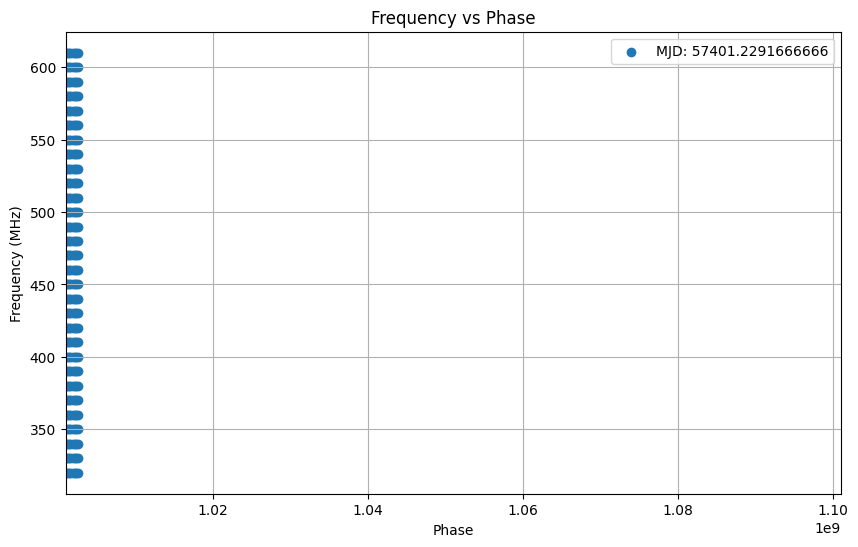

In [10]:
import matplotlib.pyplot as plt

# Extract data for plotting
pulsar_names = [output[0] for output in output_pred]
freq_pulsar = [output[6] for output in output_pred]
frequencies = [output[1] for output in output_pred]
t_mid = [output[2] for output in output_pred]
norm_phases = [output[5] for output in output_pred]

# Get unique MJD values
unique_mjd_values = list(set(t_mid))

# Plotting for each MJD
plt.figure(figsize=(10, 6))
#for mjd_value in unique_mjd_values:
    #indices = [i for i, value in enumerate(t_mid) if value == mjd_value]
    #plt.scatter([norm_phases[i] for i in indices], [frequencies[i] for i in indices], marker='o', label=f'MJD: {mjd_value}')
plt.scatter(norm_phases,frequencies, marker='o', label=f'MJD: {mjd_value}')
plt.title('Frequency vs Phase')
plt.ylabel('Frequency (MHz)')
plt.xlabel('Phase')
plt.xlim(min(norm_phases),(min(norm_phases)+1e8))
plt.legend()
plt.grid(True)
plt.show()


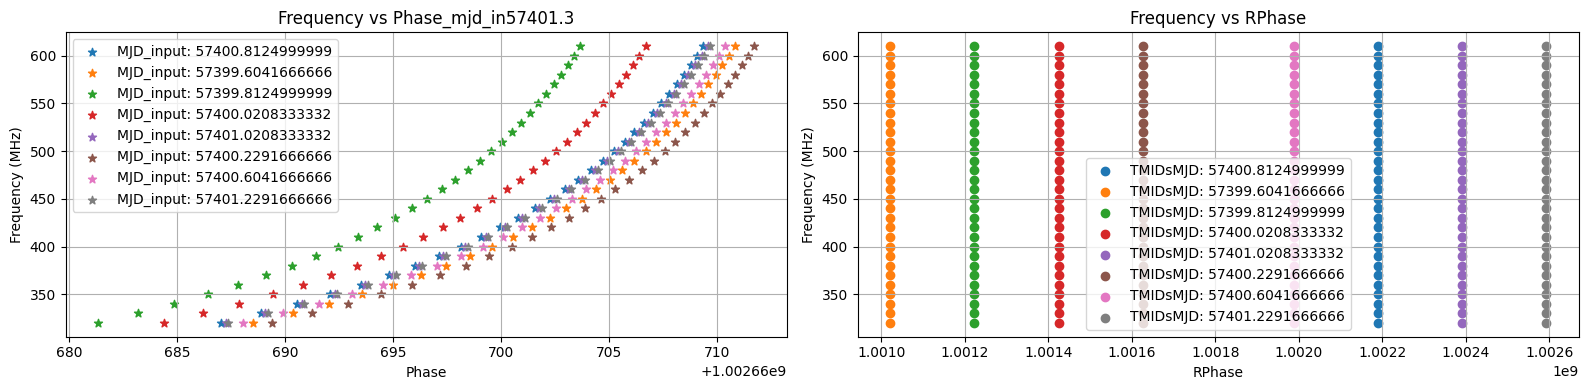

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#mjd_input = 57001.43000  # Replace with the desired MJD value

# Initialize empty lists to store values
freq_values = []
Rphase_values = []
norm_phase_values = []
phase_values_inputmjd=[]
tmids = []

# Your existing loop
for i in range(len(frequencies)):
    freq_values_tmidmjd = output_pred[i][1]
    Rphase_values_tmidmjd = output_pred[i][5]
    phase_values_mjdin = output_pred[i][4]
    #norm_phase_values_tmidmjd = output_pred[i][5]
    tmidmjd = output_pred[i][2]
    
    # Append values to the lists
    freq_values.append(freq_values_tmidmjd)
    phase_values_inputmjd.append(phase_values_mjdin)
    Rphase_values.append(Rphase_values_tmidmjd)
    #norm_phase_values.append(norm_phase_values_tmidmjd)
    tmids.append(tmidmjd)

# Create a DataFrame
#df_result = pd.DataFrame({'Frequency': freq_values,'Phase': Rphase_values,'Norm_Phase': norm_phase_values})

# Get unique MJD values
unique_mjd_values = list(set(tmids))

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Plot the first subplot
axs[0].set_title(f'Frequency vs Phase_mjd_in{mjd_input}')
axs[0].set_ylabel('Frequency (MHz)')
axs[0].set_xlabel('Phase')
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    axs[0].scatter([phase_values_inputmjd[i] for i in indices], [freq_values[i] for i in indices], marker='*', label=f'MJD_input: {mjd_value}')
    axs[1].scatter([Rphase_values[i] for i in indices], [freq_values[i] for i in indices], marker='o', label=f'TMIDsMJD: {mjd_value}')
# Plot the second subplot
axs[1].set_title(f'Frequency vs RPhase')
axs[1].set_ylabel('Frequency (MHz)')
axs[1].set_xlabel('RPhase')
# Add your code to plot the second set of data

# Add legends and grid to both subplots
axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()




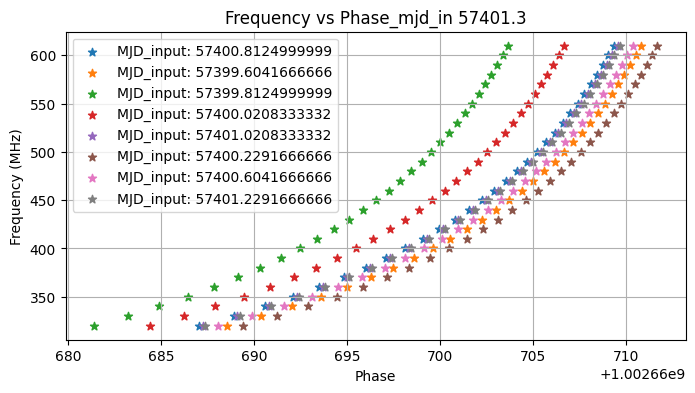

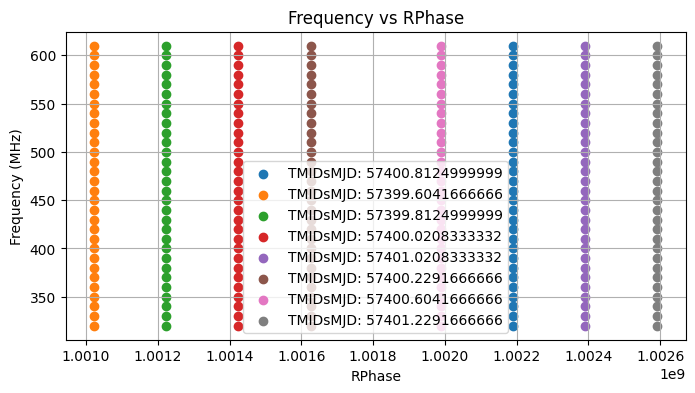

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing loop
for i in range(len(frequencies)):
    freq_values_tmidmjd = output_pred[i][1]
    Rphase_values_tmidmjd = output_pred[i][5]
    phase_values_mjdin = output_pred[i][4]
    tmidmjd = output_pred[i][2]

unique_mjd_values = list(set(tmids))

#  Frequency vs Phase
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title(f'Frequency vs Phase_mjd_in {mjd_input}')
ax.set_ylabel('Frequency (MHz)')
ax.set_xlabel('Phase')
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    ax.scatter([phase_values_inputmjd[i] for i in indices], [freq_values[i] for i in indices], marker='*', label=f'MJD_input: {mjd_value}')
ax.legend()
ax.grid(True)
plt.savefig(f'Frequency vs Phase_mjd_in {mjd_input}.png')
plt.show()

#  Frequency vs RPhase
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title(f'Frequency vs RPhase')
ax.set_ylabel('Frequency (MHz)')
ax.set_xlabel('RPhase')
for mjd_value in unique_mjd_values:
    indices = [i for i, value in enumerate(tmids) if value == mjd_value]
    ax.scatter([Rphase_values[i] for i in indices], [freq_values[i] for i in indices], marker='o', label=f'TMIDsMJD: {mjd_value}')
ax.legend()
ax.grid(True)
plt.savefig(f'Frequency vs RPhase')
plt.show()


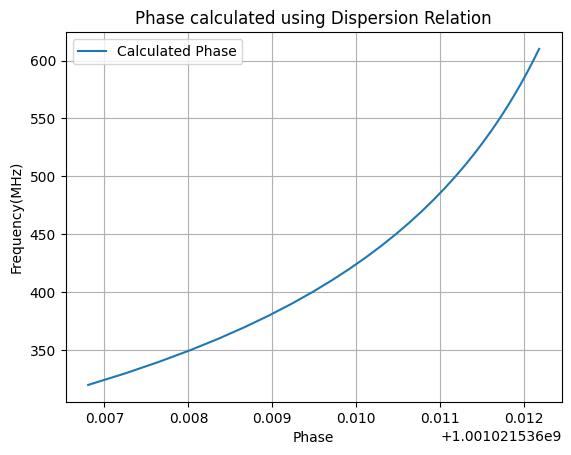

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function φ(t, f ) ≃ φ(t, f0 ) − ν(t, f0 ) (f ^−2 − f0^-2)D
def calculate_phase(f, f0, psi_t_f0, nu_t_f0, D):
    return psi_t_f0 - nu_t_f0 * (1/(f**2) - 1/(f0**2)) * D

# Assuming you have the following known values
f0 = 320  # Reference frequency of observation
psi_t_f0 = 1001021536.206806 # reference phase at f0
nu_t_f0 =   11.187214148685653# Pulsar frequency ν(t, f0)
D =  67.844629#  DM


# Generate some example frequency values
freq_values = np.arange(320,620,10)
phase_values = []
for i in range(len(freq_values)):
# Calculate corresponding phase values using the defined function
    phase_values_freq = calculate_phase(freq_values[i], f0, psi_t_f0, nu_t_f0, D)
    phase_values.append(phase_values_freq)
# Visualize the calculated values
plt.plot(phase_values,freq_values, label='Calculated Phase')
#plt.scatter(Rphase_values,freq_values,marker='*',label=f'MJD_input:{mjd_input}')   

plt.xlabel('Phase')
plt.ylabel('Frequency(MHz)')
plt.title('Phase calculated using Dispersion Relation')
plt.grid()
plt.legend()
plt.show()


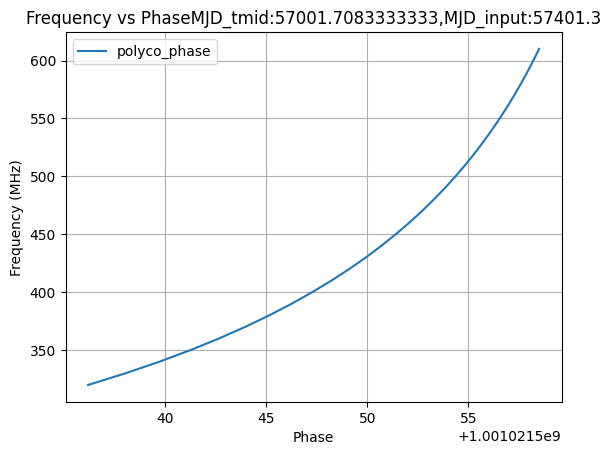

In [13]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
freq_values = []
Rphase_values = []
tmids = []
phase_values_tmid1=[]
# Your existing loop
for i in range(len(output_pred)):
    if i*len(df) < len(output_pred):
        freq_values_tmidmjd_1 = output_pred[i*(len(df))][1]
        phase_values_tmidmjd_1 = output_pred[i*len(df)][5]
        tmidmjd = output_pred[i*len(df)][2]
    #phase_values_mjdin = output_pred[i][4]
    #norm_phase_values_tmidmjd = output_pred[i][5]
    #tmidmjd = output_pred[i][2]
    
    # Append values to the lists
        freq_values.append(freq_values_tmidmjd_1)
        phase_values_tmid1.append(phase_values_tmidmjd_1)
        tmids.append(tmidmjd)

plt.plot(phase_values_tmid1,freq_values,label='polyco_phase')   
plt.title('Frequency vs Phase'f'MJD_tmid:{57399.604167},MJD_input:{mjd_input}')
plt.ylabel('Frequency (MHz)')
plt.xlabel('Phase')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
output_pred[0]

['0835-4510',
 320,
 57001.7083333333,
 57001.43,
 616158186.1897135,
 616427233.609161,
 0.1897134780883789,
 11.18793539999906]

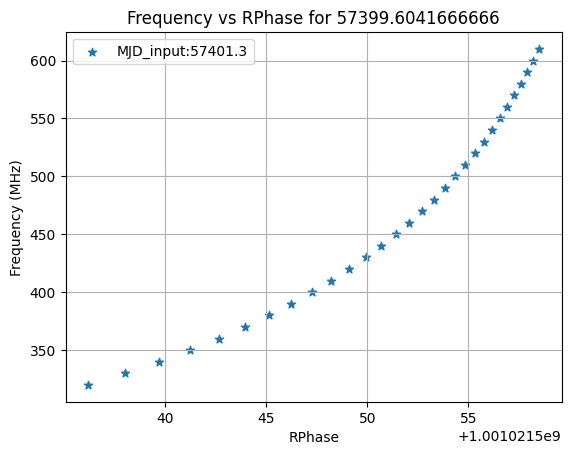

In [15]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
freq_values = []
Rphase_values = []
tmids = []
# Your existing loop
for i in range(len(output_pred)):
    if i*len(df) < len(output_pred):
        freq_values_tmidmjd_1 = output_pred[i*(len(df))][1]
        Rphase_values_tmidmjd_1 = output_pred[i*len(df)][5]
        tmidmjd = output_pred[i*len(df)][2]
    #phase_values_mjdin = output_pred[i][4]
    #norm_phase_values_tmidmjd = output_pred[i][5]
    #tmidmjd = output_pred[i][2]
    
    # Append values to the lists
        freq_values.append(freq_values_tmidmjd_1)
        Rphase_values.append(Rphase_values_tmidmjd_1)
        tmids.append(tmidmjd)

plt.scatter(Rphase_values,freq_values,marker='*',label=f'MJD_input:{mjd_input}')   
plt.title(f'Frequency vs RPhase for {tmidmjd}')
plt.ylabel('Frequency (MHz)')
plt.xlabel('RPhase')
plt.legend()
plt.grid(True)
plt.show()


In [88]:
output_pred[1]

['0835-4510',
 320,
 57001.9166666666,
 57001.43,
 616158185.8615333,
 616628616.300995,
 0.8615332841873169,
 11.187956437866424]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


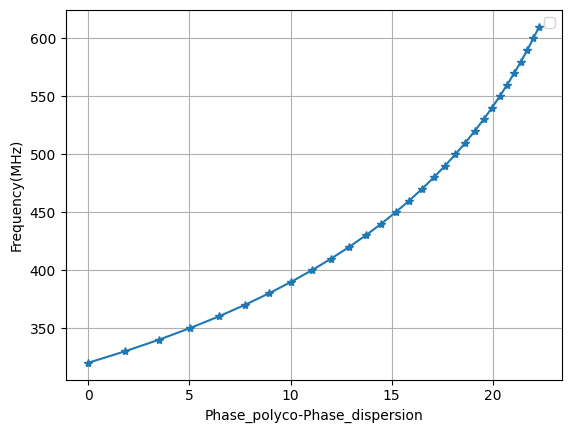

In [25]:
diffe=[]
for i in range(len(phase_values)):
    diff = phase_values_tmid1[i]-phase_values[i]
    diffe.append(diff)
plt.plot(diffe,freq_values, marker='*')   
plt.xlabel('Phase_polyco-Phase_dispersion')
plt.ylabel('Frequency(MHz)')
plt.grid()
plt.legend()
plt.show()

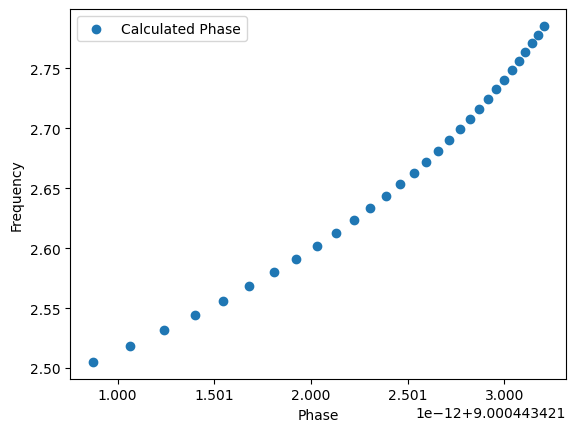

In [22]:
# Visualize the calculated values
plt.scatter(np.log10(phase_values),np.log10(freq_values), label='Calculated Phase')
#plt.scatter(np.log10(phase_values_tmid1),np.log10(freq_values),marker='*',label=f'MJD_input:{mjd_input}')   

plt.xlabel('Phase')
plt.ylabel('Frequency')
plt.legend()
#plt.ylim(min(freq_values),350)
plt.show()

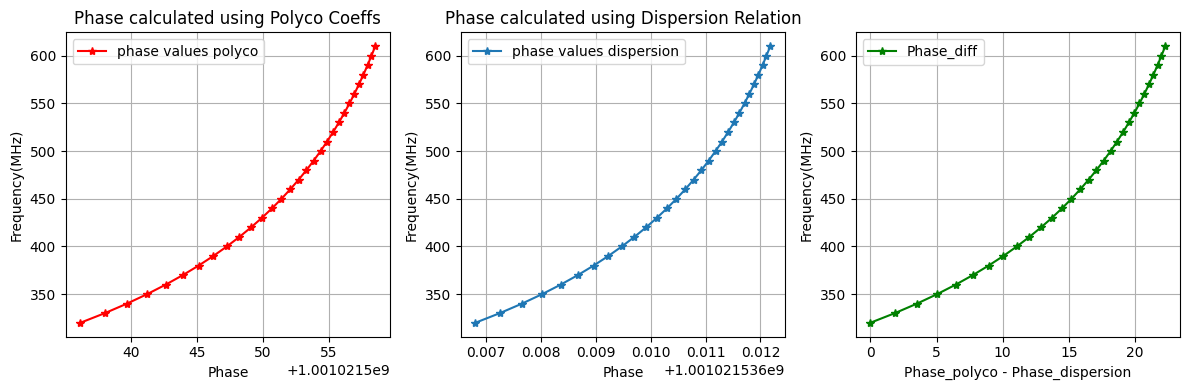

In [11]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4))

# Plot the first set of phase values
axs[0].plot(phase_values_tmid1,freq_values, marker='*',color='r',label='phase values polyco')
axs[0].set_xlabel('Phase')
axs[0].set_ylabel('Frequency(MHz)')
axs[0].set_title('Phase calculated using Polyco Coeffs')
axs[0].grid()
axs[0].legend()

# Plot the second set of phase values
axs[1].plot(phase_values,freq_values, marker='*', label='phase values dispersion')
axs[1].set_xlabel('Phase')
axs[1].set_ylabel('Frequency(MHz)')
axs[1].set_title('Phase calculated using Dispersion Relation')
axs[1].grid()
axs[1].legend()

# Calculate the differences
diffe = [phase_values_tmid1[i] - phase_values[i] for i in range(len(phase_values))]

# Plot the third set of differences
axs[2].plot(diffe, freq_values, marker='*',color='g', label='Phase_diff')
axs[2].set_xlabel('Phase_polyco - Phase_dispersion')
axs[2].set_ylabel('Frequency(MHz)')
axs[2].grid()
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


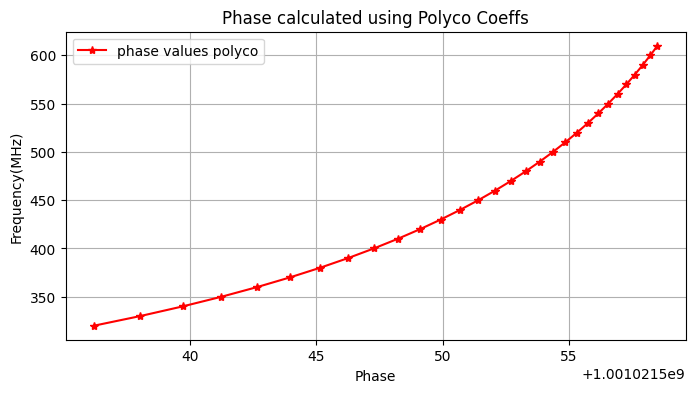

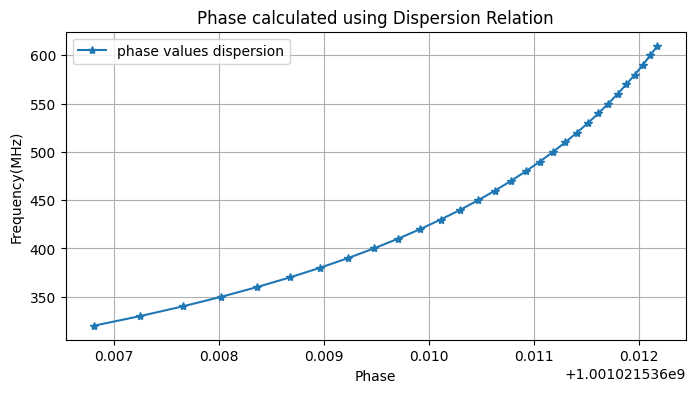

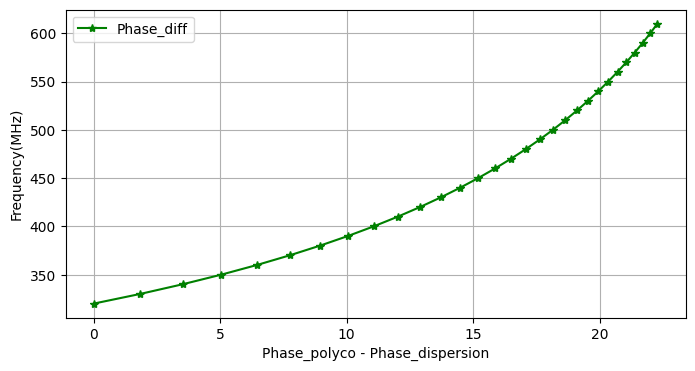

In [16]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the first set of phase values
ax.plot(phase_values_tmid1,freq_values, marker='*',color='r',label='phase values polyco')
ax.set_xlabel('Phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Phase calculated using Polyco Coeffs')
ax.grid()
ax.legend()
plt.savefig('Phase calculated using Polyco Coeffs.png')
plt.show()

# Plot the second set of phase values
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(phase_values,freq_values, marker='*', label='phase values dispersion')
ax.set_xlabel('Phase')
ax.set_ylabel('Frequency(MHz)')
ax.set_title('Phase calculated using Dispersion Relation')
ax.grid()
ax.legend()
plt.savefig('Phase calculated using Dispersion Relation.png')
plt.show()

# Calculate the differences
diffe = [phase_values_tmid1[i] - phase_values[i] for i in range(len(phase_values))]

# Plot the third set of differences
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(diffe, freq_values, marker='*',color='g', label='Phase_diff')
ax.set_xlabel('Phase_polyco - Phase_dispersion')
ax.set_ylabel('Frequency(MHz)')
ax.grid()
ax.legend()
plt.savefig('Phase_polyco - Phase_dispersion.png')
plt.show()

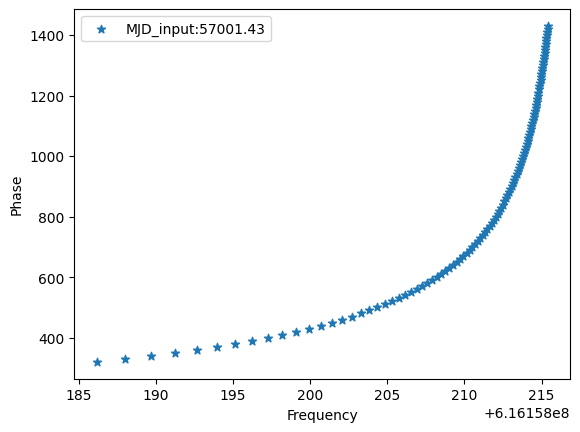

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function φ(t, f ) ≃ φ(t, f0 ) − ν(t, f0 ) (f ^−2 − f0^-2)D
def calculate_phase(f, f0, psi_t_f0, nu_t_f0, D):
    return psi_t_f0 - nu_t_f0 * (1/(f**2) - 1/(f0**2)) * D

# Assuming you have the following known values
f0 = 1430  # Reference frequency
psi_t_f0 = 616158218.0598663
nu_t_f0 =  11.187863393791591  # Your known value for ν(t, f0)
D =  67.844629  # Your known value for D

# Generate some example frequency values
freq_values = np.arange(320,1440,10)

# Calculate corresponding phase values using the defined function
phase_values = calculate_phase(freq_values, f0, psi_t_f0, nu_t_f0, D)

# Visualize the calculated values and scatter plot
#plt.plot(phase_values,freq_values, label='Calculated Phase')
plt.scatter(Rphase_values,freq_values, marker='*', label=f'MJD_input:{mjd_input}')   
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.legend()
plt.show()


In [56]:
Rphase_values

[616158186.1897135,
 616158188.0256352,
 616158189.7019573,
 616158191.2366589,
 616158192.6452527,
 616158193.9411867,
 616158195.136163,
 616158196.2404015,
 616158197.2628621,
 616158198.2114238,
 616158199.0930419,
 616158199.91387,
 616158200.67937,
 616158201.3944064,
 616158202.0633188,
 616158202.6899904,
 616158203.2779052,
 616158203.8301929,
 616158204.3496766,
 616158204.8389026,
 616158205.3001765,
 616158205.7355874,
 616158206.1470336,
 616158206.5362417,
 616158206.9047868,
 616158207.254105,
 616158207.5855111,
 616158207.9002095,
 616158208.1993048,
 616158208.4838111,
 616158208.7546614,
 616158209.0127178,
 616158209.2587723,
 616158209.4935578,
 616158209.7177522,
 616158209.9319837,
 616158210.1368334,
 616158210.3328409,
 616158210.5205084,
 616158210.7003021,
 616158210.8726566,
 616158211.0379772,
 616158211.1966408,
 616158211.3489995,
 616158211.4953842,
 616158211.6361029,
 616158211.7714446,
 616158211.9016782,
 616158212.027059,
 616158212.1478257,
 616158